In [1]:
import os
import winsound

import librosa
import librosa.display
import IPython.display

import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline

import sklearn

In [15]:
root = 'D:\GH\Audio\dataset\소리인식\분류완료'

zero_padding = 'D:\GH\Audio\dataset\preprocess_data\hospital_alarm\zero_pad'
repeating = 'D:\GH\Audio\dataset\preprocess_data\hospital_alarm\\repeat_pad'

save_zero_padding = 'D:\GH\Audio\dataset\preprocess_data\hospital_alarm\zero_pad_preprocess'
save_repeating = 'D:\GH\Audio\dataset\preprocess_data\hospital_alarm\\repeat_pad_preprocess'

In [8]:
def non_zero(data):
    idx = np.where(data != 0)[0]
    my_wants = idx[-1]
    return data[:(my_wants+1)]

In [9]:
def cut_file(filename, sr=44100):
    y, sr = librosa.load(filename, sr=sr, mono=True)
    y = non_zero(y)
    return y, sr

In [10]:
def zero_pad(file, target_length=158760, sr=44100):
    y, sr = librosa.load(file, sr=sr, mono=True)

    idx = np.where(y != 0)[0]
    non_0_idx = idx[-1]
    non_y = y[:(non_0_idx+1)]

    target_y = np.pad(non_y, (0,target_length-non_0_idx-1), 'constant', constant_values=0)
    return target_y

In [11]:
def repeat_pad(file, target_length=158760, sr=44100):
    y, sr = librosa.load(file, sr=sr, mono=True)

    idx = np.where(y != 0)[0]
    non_0_idx = idx[-1]
    non_y = y[:(non_0_idx+1)]

    repeat = target_length//len(non_y)
    remainder = target_length%len(non_y)

    target_y = np.tile(non_y, repeat)
    target_y = np.concatenate((target_y, non_y[:remainder]), axis = 0)
    return target_y

In [14]:
# Load original dataset to produce Zero padding dataset

target_length = 158760
sr = 44100
# array = np.empty(target_length)

for (root, dirs, files) in os.walk(root):
    idx = 0
    print("# root : " + root)
    if len(dirs) > 0:
        for dir_name in dirs:
            print("dir: " + dir_name)

    if len(files) > 0:
        for file_name in files:
            temp_title = file_name
            print("file: " + file_name)
            filepath = os.path.join(root, file_name)
            y = zero_pad(filepath, target_length=158760, sr=44100)
            if idx == 0:
                array = y
            else:
                array = np.vstack((array, y))
            idx += 1
        print(array.shape)
        print('Audio length (seconds): %.2f' % (int(array.shape[1]) / sr))
        np.save(os.path.join(zero_padding, temp_title[:-7]+'.npy'), array)

print("Pre Processing of data 3.6second with zero-padding DONE!")

# root : D:\GH\Audio\dataset\소리인식\분류완료
dir: Drager evita V300
dir: GE_B40 patient monitor
dir: GE_transport patient monitor
dir: PB980 ventilator
dir: Terumo TE-171
# root : D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300
file: V300 high priority alarm 01.wav
file: V300 high priority alarm 02.wav
file: V300 high priority alarm 03.wav
file: V300 high priority alarm 04.wav
file: V300 high priority alarm 05.wav
file: V300 high priority alarm 06.wav
file: V300 high priority alarm 07.wav
file: V300 high priority alarm 08.wav
file: V300 high priority alarm 09.wav
file: V300 high priority alarm 10.wav
file: V300 high priority alarm 11.wav
file: V300 high priority alarm 12.wav
file: V300 high priority alarm 13.wav
file: V300 high priority alarm 14.wav
file: V300 high priority alarm 15.wav
file: V300 high priority alarm 16.wav
file: V300 high priority alarm 17.wav
file: V300 high priority alarm 18.wav
file: V300 high priority alarm 19.wav
file: V300 high priority alarm 20.wav
file: V300 high pr

In [16]:
# Load original dataset to produce Mirroring padding dataset

target_length = 158760
sr = 44100
# array = np.empty(target_length)

for (root, dirs, files) in os.walk(root):
    idx = 0
    print("# root : " + root)
    if len(dirs) > 0:
        for dir_name in dirs:
            print("dir: " + dir_name)

    if len(files) > 0:
        for file_name in files:
            temp_title = file_name
            print("file: " + file_name)
            filepath = os.path.join(root, file_name)
            y = repeat_pad(filepath, target_length=158760, sr=44100)
            if idx == 0:
                array = y
            else:
                array = np.vstack((array, y))
            idx += 1
        print(array.shape)
        print('Audio length (seconds): %.2f' % (int(array.shape[1]) / sr))
        np.save(os.path.join(repeating, temp_title[:-7]+'.npy'), array)

print("Pre Processing of data 3.6second with repeat-padding DONE!")

# root : D:\GH\Audio\dataset\소리인식\분류완료
dir: Drager evita V300
dir: GE_B40 patient monitor
dir: GE_transport patient monitor
dir: PB980 ventilator
dir: Terumo TE-171
# root : D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300
file: V300 high priority alarm 01.wav
file: V300 high priority alarm 02.wav
file: V300 high priority alarm 03.wav
file: V300 high priority alarm 04.wav
file: V300 high priority alarm 05.wav
file: V300 high priority alarm 06.wav
file: V300 high priority alarm 07.wav
file: V300 high priority alarm 08.wav
file: V300 high priority alarm 09.wav
file: V300 high priority alarm 10.wav
file: V300 high priority alarm 11.wav
file: V300 high priority alarm 12.wav
file: V300 high priority alarm 13.wav
file: V300 high priority alarm 14.wav
file: V300 high priority alarm 15.wav
file: V300 high priority alarm 16.wav
file: V300 high priority alarm 17.wav
file: V300 high priority alarm 18.wav
file: V300 high priority alarm 19.wav
file: V300 high priority alarm 20.wav
file: V300 high pr

In [22]:
test_path = 'D:\GH\Audio\dataset\소리인식\dataset\zero_pad\\b40 high.npy'

y = np.load(test_path)
sr = 44100

y1 = y[0]
print(y1.shape)
print('Audio length (seconds): %.2f' % (len(y1) / sr))

(158760,)
Audio length (seconds): 3.60


(1025, 156)


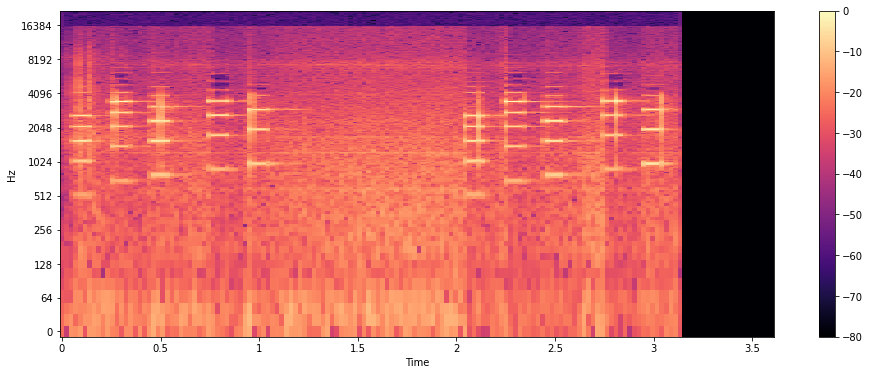

In [25]:
## Spectogram
D = np.abs(librosa.stft(y1, n_fft=2048, hop_length=1024))
print(D.shape)

DB = librosa.power_to_db(D, ref=np.max) #소리의 단위를 db로 바꿈 

plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=1024, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

(128, 311)


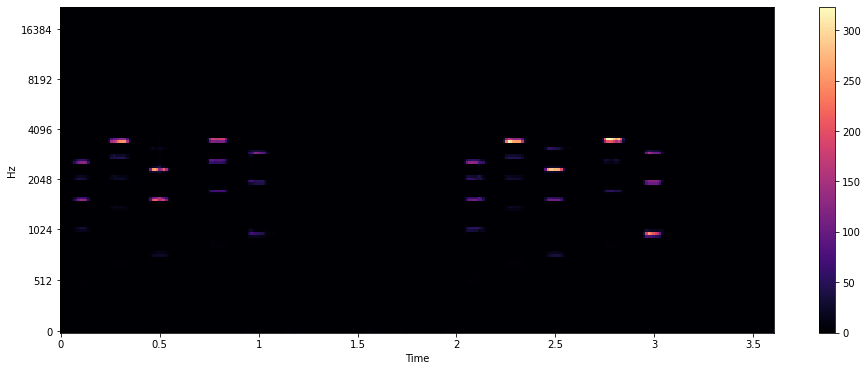

In [26]:
## Mel-Spectogram
S = librosa.feature.melspectrogram(y=y1, sr=sr)
print(S.shape)
plt.figure(figsize=(16, 6))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

(128, 311)


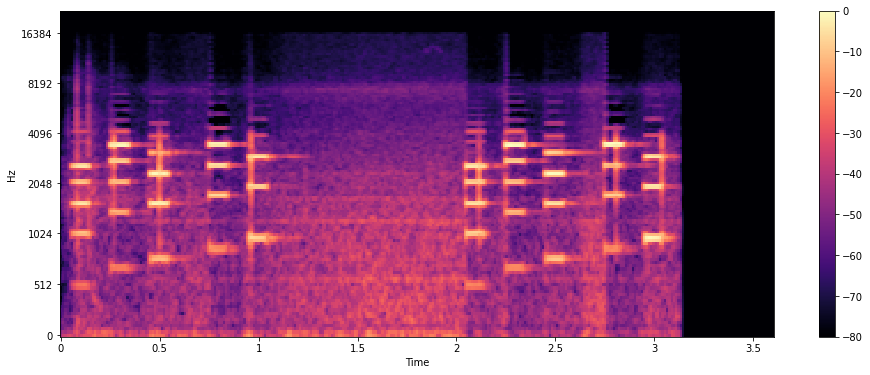

In [27]:
## Log-Mel-Spectogram

S = librosa.feature.melspectrogram(y=y1, sr=sr)
log_S = librosa.power_to_db(S, ref=np.max)
print(log_S.shape)
plt.figure(figsize=(16, 6))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

In [28]:
import sklearn

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

mean: -12.20
var: 8220.34
(20, 311)


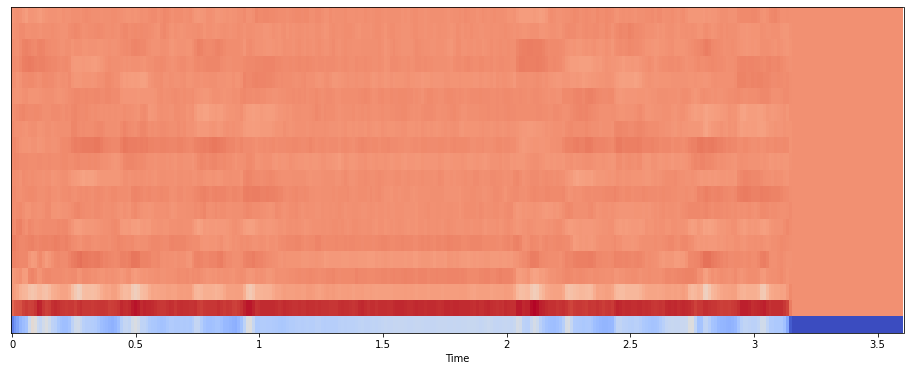

In [36]:
# Mel-Frequency Cepstral Coefficients (MFCCs)

mfccs = librosa.feature.mfcc(y=y1, sr=sr)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())
print(mfccs.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

mean: 0.52
var: 0.05
(20, 311)


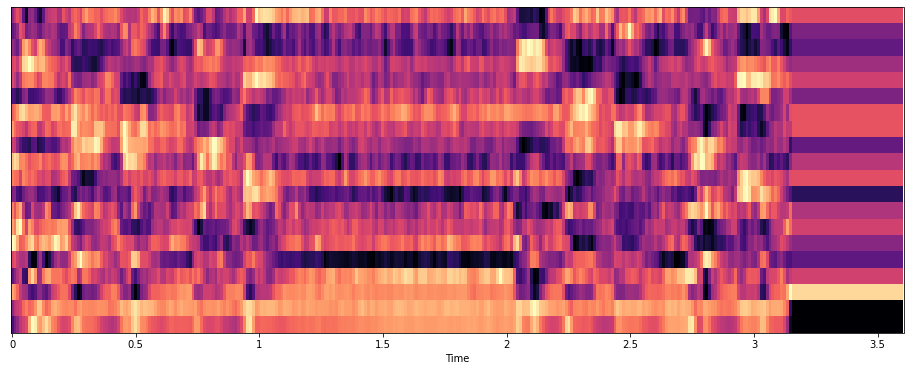

In [37]:
# Normalized Mel-Frequency Cepstral Coefficients (MFCCs)

mfccs = librosa.feature.mfcc(y=y1, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())
print(mfccs.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

mean: -0.00
var: 2.37
(20, 311)


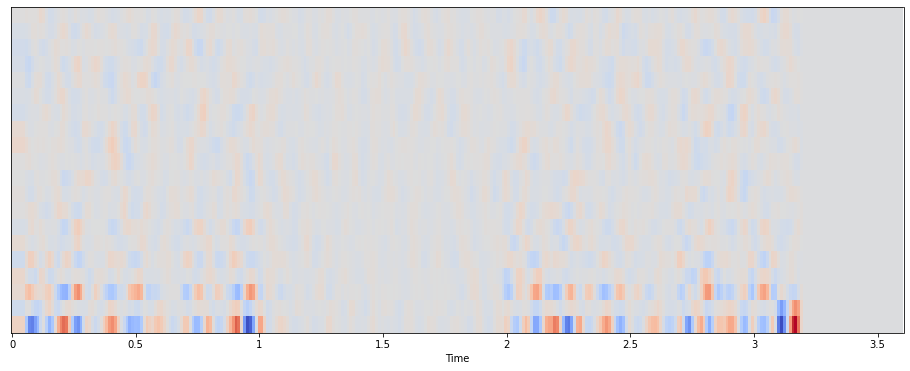

In [38]:
# Delta Mel-Frequency Cepstral Coefficients (MFCCs)

mfccs = librosa.feature.mfcc(y=y1, sr=sr)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
# mfccs = normalize(delta2_mfccs, axis=1)

print('mean: %.2f' % delta2_mfccs.mean())
print('var: %.2f' % delta2_mfccs.var())
print(delta2_mfccs.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(delta2_mfccs, sr=sr, x_axis='time')
plt.show()

In [40]:
def spectrogram(y, sr, n_fft=2048, hop_length=1024):
    ## Spectogram
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.power_to_db(D, ref=np.max) #소리의 단위를 db로 바꿈 
    return DB

In [45]:
def Mel_spectrogram(y, sr, log=False):    
    ## Mel-Spectogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    if log:
        log_S = librosa.power_to_db(S, ref=np.max)
        return log_S
    return S

In [47]:
def MFCC(y, sr, delta=False, Normalize=False):   
    # Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    if Normalize:
        mfccs = normalize(mfccs, axis=1)
        return mfccs
    if delta:
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)
        return delta2_mfccs
    return mfccs

In [49]:
test_path = 'D:\GH\Audio\dataset\소리인식\dataset\zero_pad\\b40 high.npy'

y = np.load(test_path)
sr = 44100

y1 = y[0]
print(y1.shape)
print('Audio length (seconds): %.2f' % (len(y1) / sr))

DB = spectrogram(y1, sr)
print(DB.shape)
S = Mel_spectrogram(y1, sr)
print(S.shape)
log_S = Mel_spectrogram(y1, sr, log=True)
print(log_S.shape)
mfcc = MFCC(y1, sr)
print(mfcc.shape)
delta_mfcc = MFCC(y1, sr, delta=True)
print(delta_mfcc.shape)

(158760,)
Audio length (seconds): 3.60
(1025, 156)
(128, 311)
(128, 311)
(20, 311)
(20, 311)


In [51]:
DB_total = spectrogram(y, sr)
print(DB_total.shape)
S_total = Mel_spectrogram(y, sr)
print(S_total.shape)
log_S_total = Mel_spectrogram(y, sr, log=True)
print(log_S_total.shape)
mfcc_total = MFCC(y, sr)
print(mfcc_total.shape)
delta_mfcc_total = MFCC(y, sr, delta=True)
print(delta_mfcc_total.shape)

(72, 1025, 156)
(72, 128, 311)
(72, 128, 311)
(72, 20, 311)
(72, 20, 311)


In [58]:
bool_arr = (DB == DB_total[0])
print(bool_arr)

result = np.all(bool_arr)
print(result)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
False


In [61]:
save_path = 'D:\GH\Audio\dataset\소리인식\dataset\zero_pad_preprocess1'
for file in os.listdir(save_path1):
    filepath = os.path.join(save_path1, file)
    # print(file[:-4])
    y = np.load(filepath)
    sr = 44100
    DB = spectrogram(y, sr)
    S = Mel_spectrogram(y, sr)
    log_S = Mel_spectrogram(y, sr, log=True)
    mfcc = MFCC(y, sr)
    delta_mfcc = MFCC(y, sr, delta=True)
    np.savez_compressed(os.path.join(save_path, file[:-4]), 
    spectrogram=DB, Mel_spectrogram=S, Log_Mel_spectrogram=log_S, mfcc=mfcc, delta_mfcc=delta_mfcc)
    '''
    loaded = np.load('파일명.npz')
    loaded['spectrogram']
    loaded['Mel_spectrogram']
    loaded['Log_Mel_spectrogram']
    loaded['mfcc']
    loaded['delta_mfcc']
    '''

In [62]:
save_path = 'D:\GH\Audio\dataset\소리인식\dataset\\repeat_pad_preprocess1'
for file in os.listdir(save_path2):
    filepath = os.path.join(save_path2, file)
    # print(file[:-4])
    y = np.load(filepath)
    sr = 44100
    DB = spectrogram(y, sr)
    S = Mel_spectrogram(y, sr)
    log_S = Mel_spectrogram(y, sr, log=True)
    mfcc = MFCC(y, sr)
    delta_mfcc = MFCC(y, sr, delta=True)
    np.savez_compressed(os.path.join(save_path, file[:-4]), 
    spectrogram=DB, Mel_spectrogram=S, Log_Mel_spectrogram=log_S, mfcc=mfcc, delta_mfcc=delta_mfcc)
    '''
    loaded = np.load('파일명.npz')
    loaded['spectrogram']
    loaded['Mel_spectrogram']
    loaded['Log_Mel_spectrogram']
    loaded['mfcc']
    loaded['delta_mfcc']
    '''

## Load Data

In [95]:
load_path = 'D:\GH\Audio\dataset\소리인식\dataset\zero_pad_preprocess1'
for idx, file in enumerate(os.listdir(load_path)):
    filepath = os.path.join(load_path, file)
    loaded = np.load(filepath)
    print('class number :',idx, file[:-4])
    x = loaded['Log_Mel_spectrogram']
    y = np.zeros((x.shape[0], 1), dtype=np.int8)
    y = y + idx
    print(x.shape)
    print(y.shape)
    ratio = round(x.shape[0]*0.2)   # 각 클래스별 나누는 비율
    flag = x.shape[0]-ratio
    if idx == 0:
        x_train = x[:flag]
        y_train = y[:flag]
        x_test = x[flag:]
        y_test = y[flag:]
    else:
        x_train = np.vstack((x_train, x[:flag]))
        y_train = np.vstack((y_train, y[:flag]))
        x_test = np.vstack((x_test, x[flag:]))
        y_test = np.vstack((y_test, y[flag:]))
        

class number : 0 b40 high
(72, 128, 311)
(72, 1)
class number : 1 b40 medium
(69, 128, 311)
(69, 1)
class number : 2 high priority alarm
(65, 128, 311)
(65, 1)
class number : 3 TE171 occlusion alarm
(76, 128, 311)
(76, 1)
class number : 4 transport advisory alarm
(71, 128, 311)
(71, 1)
class number : 5 transport crisis alarm
(71, 128, 311)
(71, 1)
class number : 6 transport warning alarm
(75, 128, 311)
(75, 1)
class number : 7 V300 high priority alarm
(70, 128, 311)
(70, 1)


In [96]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(456, 128, 311)
(456, 1)
(113, 128, 311)
(113, 1)


In [97]:
x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [98]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(456, 128, 311, 1)
(456,)
(113, 128, 311, 1)
(113,)


In [99]:
np.random.seed(0)

# 배열의 원소 개수만큼 인덱스 배열을 만든 후 
# 무작위로 뒤섞어 줍니다. 
idx_train = np.arange(x_train.shape[0])
idx_test = np.arange(x_test.shape[0])
# print(idx_train)
# print(idx_test)
np.random.shuffle(idx_train)
np.random.shuffle(idx_test)

x_train_shuffle = x_train[idx_train]
y_train_shuffle = y_train[idx_train]
x_test_shuffle = x_test[idx_test]
y_test_shuffle = y_test[idx_test]